# Machine Learning Model 
This section tests the propriety of using RandomForrestClassifier.

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import math

In [68]:
lotto_data = pd.read_csv("lotto_florida_mlready.csv", parse_dates=True, index_col=0)

In [69]:
lotto_data.shape[0]

898

In [70]:
lotto_data.head()

,ball_1,ball_2,ball_3,ball_4,ball_5,ball_6,ball_1_mean,ball_1_ustd,ball_1_dstd,ball_1_ystd,...,ball_5_ratio_50,ball_6_ratio_50,ball_1_ratio_100,ball_2_ratio_100,ball_3_ratio_100,ball_4_ratio_100,ball_5_ratio_100,ball_6_ratio_100,ball_1_tomorrow,ball_1_target
date,,,,,,,,,,,,,,,,,,,,,
2014-04-01,10,23,68,74,75,9,11.534535,20.684304,2.384765,-1.534535,...,1.316713,0.635593,0.925069,1.070764,2.043269,1.684115,1.346983,0.589777,17.0,1
2014-04-04,1,10,15,41,54,9,11.534535,20.684304,2.384765,-10.534535,...,0.941751,0.636492,0.090744,0.461255,0.441176,0.918459,0.960341,0.606061,3.0,1
2014-04-08,35,36,41,60,71,3,11.534535,20.684304,2.384765,23.465465,...,1.238228,0.212465,3.196347,1.666667,1.198480,1.346197,1.261549,0.201207,3.0,0
2014-04-11,3,42,44,47,57,8,11.534535,20.684304,2.384765,-8.534535,...,0.984456,0.582242,0.266430,1.921317,1.275732,1.039133,1.003521,0.555170,16.0,1
2014-04-15,4,39,46,47,70,13,11.534535,20.684304,2.384765,-7.534535,...,1.208564,1.018809,0.353357,1.754386,1.321839,1.037528,1.227855,0.942029,2.0,0


In [71]:
round(lotto_data["ball_1_ystd"])
print(round(lotto_data["ball_1_ystd"]))

date
2014-04-01    -2.0
2014-04-04   -11.0
2014-04-08    23.0
2014-04-11    -9.0
2014-04-15    -8.0
              ... 
2022-11-22     1.0
2022-11-25    17.0
2022-11-29     8.0
2022-12-02   -11.0
2022-12-06     3.0
Name: ball_1_ystd, Length: 898, dtype: float64


In [72]:
from sklearn.linear_model import Ridge
#import the train-test-split function
from sklearn.model_selection import train_test_split

reg = Ridge(alpha=.1)


In [73]:
#X = lotto_data[["ball_1", "ball_1_mean", "ball_1_ustd", "ball_1_dstd", "ball_1_ystd", "ball_1_ratio_2", "ball_1_ratio_10", "ball_1_ratio_20", "ball_1_ratio_100"]]
#y = lotto_data["ball_1_tomorrow"]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [46]:
predictors = ["ball_1", "ball_1_mean", "ball_1_ustd", "ball_1_dstd", "ball_1_ystd", "ball_1_ratio_2", "ball_1_ratio_10", "ball_1_ratio_20", "ball_1_ratio_30", "ball_1_ratio_50", "ball_1_ratio_100"]

In [74]:
y_train = lotto_data.iloc[:-100]
y_test = lotto_data.iloc[-100:]

In [75]:
reg.fit(y_train[predictors], y_train["ball_1_tomorrow"])

Ridge(alpha=0.1)

In [76]:
predictions = reg.predict(y_test[predictors])

In [77]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test["ball_1_tomorrow"], predictions)

7.346830217905158

In [78]:
#check accuracy using actual and predicted values
combined = pd.concat([y_test["ball_1_tomorrow"], pd.Series(predictions, index=y_test.index)], axis=1)
combined.columns = ["actual", "predictions"]

In [79]:
combined.iloc[20:30, :]

,actual,predictions
date,,
2022-03-04,2.0,12.011639
2022-03-08,39.0,11.103914
2022-03-11,6.0,13.428658
2022-03-15,16.0,12.393388
2022-03-18,14.0,11.953434
2022-03-22,15.0,11.636334
2022-03-25,9.0,12.008444
2022-03-29,5.0,11.317762
2022-04-01,8.0,10.283717


In [80]:
#import the train-test-split function
#from sklearn.model_selection import train_test_split

#X = lotto_data[["ball_1", "ball_1_mean", "ball_1_ustd", "ball_1_dstd", "ball_1_ystd", "ball_1_ratio_2", "ball_1_ratio_10", "ball_1_ratio_20", "ball_1_ratio_100"]]
#y = lotto_data["ball_1_tomorrow"]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [81]:
#import RFM
#from sklearn.ensemble import RandomForestClassifier

#create gaussian classifier
#clf = RandomForestClassifier(n_estimators=100, random_state=1)

#train the model using training sets y_pred=clf.predict(X_test)
#clf.fit(X_train, y_train)

#y_pred=clf.predict(X_test)

In [82]:
#check accuracy using actual and predicted values
#import sckitlearn metrics module for accuracy calc
#from sklearn import metrics

#print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

<AxesSubplot: xlabel='date'>

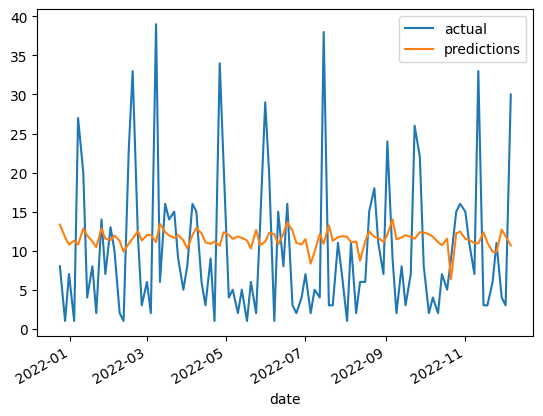

In [83]:
combined.plot()

In [84]:
def create_predictions(predictors, lotto_data, reg):
    y_train = lotto_data.iloc[:-100]
    y_test = lotto_data.iloc[-100:]
    reg.fit(y_train[predictors], y_train["ball_1_tomorrow"])
    predictions = reg.predict(y_test[predictors])
    error = mean_absolute_error(y_test["ball_1_tomorrow"], predictions)
    combined = pd.concat([y_test["ball_1_tomorrow"], pd.Series(predictions, index=y_test.index)], axis=1)
    combined.columns = ["actual", "predictions"]
    return error, combined

In [87]:
predictors = ["ball_1", "ball_1_mean", "ball_1_ustd", "ball_1_dstd", "ball_1_ystd", "ball_1_ratio_2", "ball_1_ratio_10", "ball_1_ratio_20", "ball_1_ratio_30", "ball_1_ratio_50", "ball_1_ratio_100", "ball_1_rolling_2", "ball_1_rolling_10", "ball_1_rolling_20", "ball_1_rolling_30", "ball_1_rolling_50"]

In [88]:
predictors

['ball_1',
 'ball_1_mean',
 'ball_1_ustd',
 'ball_1_dstd',
 'ball_1_ystd',
 'ball_1_ratio_2',
 'ball_1_ratio_10',
 'ball_1_ratio_20',
 'ball_1_ratio_30',
 'ball_1_ratio_50',
 'ball_1_ratio_100',
 'ball_1_rolling_2',
 'ball_1_rolling_10',
 'ball_1_rolling_20',
 'ball_1_rolling_30',
 'ball_1_rolling_50']

In [89]:
lotto_data_copy = lotto_data.iloc[30:, :].copy()

In [90]:
error, combined = create_predictions(predictors, lotto_data_copy, reg)

In [91]:
error

7.317965896394278

<AxesSubplot: xlabel='date'>

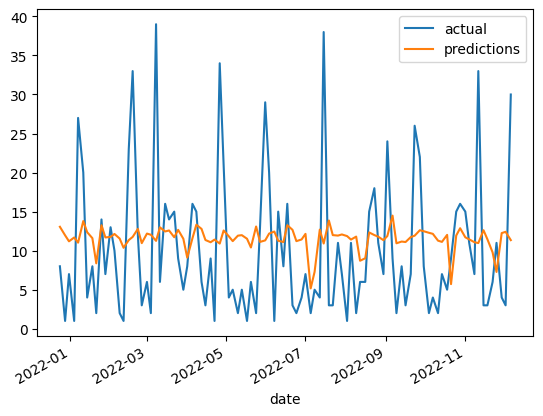

In [96]:
#check accuracy using actual and predicted values
#import sckitlearn metrics module for accuracy calc
from sklearn.metrics import precision_score


combined.plot()

In [97]:
lotto_data.head()

,ball_1,ball_2,ball_3,ball_4,ball_5,ball_6,ball_1_mean,ball_1_ustd,ball_1_dstd,ball_1_ystd,...,ball_5_ratio_50,ball_6_ratio_50,ball_1_ratio_100,ball_2_ratio_100,ball_3_ratio_100,ball_4_ratio_100,ball_5_ratio_100,ball_6_ratio_100,ball_1_tomorrow,ball_1_target
date,,,,,,,,,,,,,,,,,,,,,
2014-04-01,10,23,68,74,75,9,11.534535,20.684304,2.384765,-1.534535,...,1.316713,0.635593,0.925069,1.070764,2.043269,1.684115,1.346983,0.589777,17.0,1
2014-04-04,1,10,15,41,54,9,11.534535,20.684304,2.384765,-10.534535,...,0.941751,0.636492,0.090744,0.461255,0.441176,0.918459,0.960341,0.606061,3.0,1
2014-04-08,35,36,41,60,71,3,11.534535,20.684304,2.384765,23.465465,...,1.238228,0.212465,3.196347,1.666667,1.198480,1.346197,1.261549,0.201207,3.0,0
2014-04-11,3,42,44,47,57,8,11.534535,20.684304,2.384765,-8.534535,...,0.984456,0.582242,0.266430,1.921317,1.275732,1.039133,1.003521,0.555170,16.0,1
2014-04-15,4,39,46,47,70,13,11.534535,20.684304,2.384765,-7.534535,...,1.208564,1.018809,0.353357,1.754386,1.321839,1.037528,1.227855,0.942029,2.0,0


In [108]:
references = [2,5,10,20,30,50,60]

for reference in references:
    lotto_data[f"{reference}_rfrnce"] = int(f"{reference}")

lotto_data.head()

,ball_1,ball_2,ball_3,ball_4,ball_5,ball_6,ball_1_mean,ball_1_ustd,ball_1_dstd,ball_1_ystd,...,ball_6_ratio_100,ball_1_tomorrow,ball_1_target,2_rfrnce,5_rfrnce,10_rfrnce,20_rfrnce,30_rfrnce,50_rfrnce,60_rfrnce
date,,,,,,,,,,,,,,,,,,,,,
2014-04-01,10,23,68,74,75,9,11.534535,20.684304,2.384765,-1.534535,...,0.589777,17.0,1,2,5,10,20,30,50,60
2014-04-04,1,10,15,41,54,9,11.534535,20.684304,2.384765,-10.534535,...,0.606061,3.0,1,2,5,10,20,30,50,60
2014-04-08,35,36,41,60,71,3,11.534535,20.684304,2.384765,23.465465,...,0.201207,3.0,0,2,5,10,20,30,50,60
2014-04-11,3,42,44,47,57,8,11.534535,20.684304,2.384765,-8.534535,...,0.555170,16.0,1,2,5,10,20,30,50,60
2014-04-15,4,39,46,47,70,13,11.534535,20.684304,2.384765,-7.534535,...,0.942029,2.0,0,2,5,10,20,30,50,60


In [109]:
print(lotto_data.dtypes)

ball_1       int64
ball_2       int64
ball_3       int64
ball_4       int64
ball_5       int64
             ...  
10_rfrnce    int64
20_rfrnce    int64
30_rfrnce    int64
50_rfrnce    int64
60_rfrnce    int64
Length: 114, dtype: object


In [110]:
for reference in references:
    for i in range (1, 2, 1):
        lotto_data[f"ball_{i}_rfrnce_{reference}"] = (lotto_data[f"{reference}_rfrnce"] > lotto_data[f"ball_{i}"].shift(-1)).astype(int)

lotto_data.head()

,ball_1,ball_2,ball_3,ball_4,ball_5,ball_6,ball_1_mean,ball_1_ustd,ball_1_dstd,ball_1_ystd,...,30_rfrnce,50_rfrnce,60_rfrnce,ball_1_rfrnce_2,ball_1_rfrnce_5,ball_1_rfrnce_10,ball_1_rfrnce_20,ball_1_rfrnce_30,ball_1_rfrnce_50,ball_1_rfrnce_60
date,,,,,,,,,,,,,,,,,,,,,
2014-04-01,10,23,68,74,75,9,11.534535,20.684304,2.384765,-1.534535,...,30,50,60,1,1,1,1,1,1,1
2014-04-04,1,10,15,41,54,9,11.534535,20.684304,2.384765,-10.534535,...,30,50,60,0,0,0,0,0,1,1
2014-04-08,35,36,41,60,71,3,11.534535,20.684304,2.384765,23.465465,...,30,50,60,0,1,1,1,1,1,1
2014-04-11,3,42,44,47,57,8,11.534535,20.684304,2.384765,-8.534535,...,30,50,60,0,1,1,1,1,1,1
2014-04-15,4,39,46,47,70,13,11.534535,20.684304,2.384765,-7.534535,...,30,50,60,0,0,0,1,1,1,1


In [118]:
predictors = []
periods = [2,10,20,30,50,100]

predictors += ["ball_1", "ball_1_ustd", "ball_1_dstd", "ball_1_ystd"]

for period in periods:
    predictors += [f"ball_1_rolling_{period}"]
    predictors += [f"ball_1_ratio_{period}"]
for reference in references:
    predictors += [f"ball_1_rfrnce_{reference}"]
    predictors += [f"{reference}_rfrnce"]



predictors

['ball_1',
 'ball_1_ustd',
 'ball_1_dstd',
 'ball_1_ystd',
 'ball_1_rolling_2',
 'ball_1_ratio_2',
 'ball_1_rolling_10',
 'ball_1_ratio_10',
 'ball_1_rolling_20',
 'ball_1_ratio_20',
 'ball_1_rolling_30',
 'ball_1_ratio_30',
 'ball_1_rolling_50',
 'ball_1_ratio_50',
 'ball_1_rolling_100',
 'ball_1_ratio_100',
 'ball_1_rfrnce_2',
 '2_rfrnce',
 'ball_1_rfrnce_5',
 '5_rfrnce',
 'ball_1_rfrnce_10',
 '10_rfrnce',
 'ball_1_rfrnce_20',
 '20_rfrnce',
 'ball_1_rfrnce_30',
 '30_rfrnce',
 'ball_1_rfrnce_50',
 '50_rfrnce',
 'ball_1_rfrnce_60',
 '60_rfrnce']

In [119]:
error, combined = create_predictions(predictors, lotto_data, reg)

In [120]:
error

7.310006338671841